<a href="https://colab.research.google.com/github/dorota10/ML_UEP_2024/blob/CaseStudy1/CaseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Źódło danych: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Cel: Znajdowanie oszustw w transakcjach kartą

### Importy

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, roc_auc_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
import time
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Przygotowanie danych

In [4]:
dane=pd.read_csv("../datasets/creditcard.csv")

In [5]:
dane.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X_data=dane.iloc[:, 1:-2] #bez amount
y_data=dane.iloc[:,-1]

In [7]:
y_data.value_counts()/y_data.value_counts().sum()

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

### KNN

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Tutaj możesz dostosować liczbę sąsiadów (n_neighbors)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.9995435553526912
[[56860     4]
 [   22    76]]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Dokładność: {accuracy:.4f}')
print(f'Precyzja: {precision:.4f}')
print(f'Czułość: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Dokładność: 0.9995
Precyzja: 0.9500
Czułość: 0.7755
F1-score: 0.8539


In [9]:
ros=RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

y_train_ros.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_ros, y_train_ros)

y_pred = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[56842    22]
 [   17    81]]


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Dokładność: {accuracy:.4f}')
print(f'Precyzja: {precision:.4f}')
print(f'Czułość: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Dokładność: 0.9993
Precyzja: 0.7864
Czułość: 0.8265
F1-score: 0.8060


In [79]:
smote=SMOTE(sampling_strategy=0.1)
X_smote, y_smote =smote.fit_resample(X_data, y_data)
rus=RandomUnderSampler(sampling_strategy=0.5)
X_rus, y_rus =rus.fit_resample(X_smote, y_smote)
print("Rozkład w danych oryginalnych")
print(y_data.value_counts())
print("Zwiększenie klasy mniejszościowej przez dodanie syntetycznych oberwacji (SMOTE)")
print(y_smote.value_counts())
print("Zmniejszenie klasy większościowej")
print(y_rus.value_counts())

Rozkład w danych oryginalnych
Class
0    284315
1       492
Name: count, dtype: int64
Zwiększenie klasy mniejszościowej przez dodanie syntetycznych oberwacji (SMOTE)
Class
0    284315
1     28431
Name: count, dtype: int64
Zmniejszenie klasy większościowej
Class
0    56862
1    28431
Name: count, dtype: int64


### Badanie różnych metod klasyfikacji i resamplingu

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=40),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}

samplers = {
    'SMOTE': SMOTE(sampling_strategy=0.1),
    'RandomOverSampler': RandomOverSampler(sampling_strategy=0.1)
}

results = pd.DataFrame(columns=['Model', 'Sampler', 'ROC-AUC', 'Czas wykonywania'])

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():
        pipeline = ImbPipeline([
            ('sampler', sampler), #zwiększanie małolicznej klasy
            ('under', RandomUnderSampler(sampling_strategy=0.5)), #zmniejszenie dużolicznej klasy
            ('model', model)
        ])

        start=time.time()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X_data, y_data, scoring='roc_auc', cv=cv, n_jobs=-1)
        czas=time.time()-start

        result_row ={
            'Model': model_name,
            'Sampler': sampler_name,
            'ROC-AUC': np.mean(scores),
            'Czas wykonywania': czas
        }
        print(result_row)

        results=pd.concat([results, pd.DataFrame([result_row])], ignore_index=True)

In [109]:
results

,Model,Sampler,ROC-AUC,Czas wykonywania
0,RandomForest,SMOTE,0.976647,115.058295
1,RandomForest,RandomOverSampler,0.959422,89.186854
2,KNN,SMOTE,0.942246,65.690809
3,KNN,RandomOverSampler,0.933519,61.851810
4,LogisticRegression,SMOTE,0.978189,4.661419
5,LogisticRegression,RandomOverSampler,0.979451,4.095926
6,SVM,SMOTE,0.977002,279.046807
7,SVM,RandomOverSampler,0.982031,395.202021


In [80]:
results.to_excel("results_methods.xlsx")

Ze względu na dokładność i szybkość wykonywaia działań, najlepszą metodą okazała się regresja logistyczna przy użyciu RandomOverSampler (do zwiększenia najmniej licznej klasy), a potem RandomUnderSampler (do zmniejszenia najbardziej licznej klasy).
W wyniku 10-krotnej walidacji krzyżowej otrzymano średnie pole pod krzywą ROC równe 0,979. Obliczenia trwały 4,1 sekund.
Metoda SVM osiąga wynik ROC-AUC tylko o 0,0026 większy, ale czas jest prawie 100-krotnie dłuższy.

### Modyfikacja resamplingu dla regresji logistycznej

In [106]:
sampling_strategies = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
recall_smote=[]
roc_auc_smote=[]
for strategy in sampling_strategies:
    oversampler = SMOTE(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    # print(y_resampled.value_counts())

    model = LogisticRegression(random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)
    recall_smote.append(recall_score(y_test, y_pred))
    roc_auc_smote.append(roc_auc_score(y_test, y_pred))

recall_ros=[]
roc_auc_ros=[]
for strategy in sampling_strategies:
    oversampler = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    # print(y_resampled.value_counts())

    model = LogisticRegression(random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)
    recall_ros.append(recall_score(y_test, y_pred))
    roc_auc_ros.append(roc_auc_score(y_test, y_pred))

In [110]:
scores_oversampling= pd.DataFrame({
    'Sampling Strategy': sampling_strategies,
    'ROC-AUC SMOTE': roc_auc_smote,
    'ROC-AUC RandomOverSampler': roc_auc_ros
})

In [111]:
px.line(scores_oversampling, x='Sampling Strategy', y=['ROC-AUC SMOTE', 'ROC-AUC RandomOverSampler'])

Porównując metodę SMOTE i RandomOverSampling dla różnych strategii, najlepsza okazała się metoda SMOTE dla strategii, w której liczebność drugiej klasy stanowiła 60% liczebności klasy pierwszej.

In [22]:
oversampler = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
recall=recall_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

print(f"Czułość : {recall}")
print(f"ROC-AUC : {roc_auc}")

Class
0    227451
1    136470
Name: count, dtype: int64
Czułość : 0.9183673469387755
ROC-AUC : 0.9521229672229048


In [24]:
undersampling_strategies = [0.6, 0.7, 0.8, 0.9, 1]
recall_under=[]
roc_auc_under=[]
for strategy in undersampling_strategies:
    undersampler = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
    X_resampled2, y_resampled2 = undersampler.fit_resample(X_resampled, y_resampled)

    model = LogisticRegression(random_state=42)
    model.fit(X_resampled2, y_resampled2)

    y_pred = model.predict(X_test)
    recall_under.append(recall_score(y_test, y_pred))
    roc_auc_under.append(roc_auc_score(y_test, y_pred))

In [25]:
scores_undersampling= pd.DataFrame({
    'Sampling Strategy': undersampling_strategies,
    'ROC-AUC RandomUnderSampler': roc_auc_under
})

px.line(scores_undersampling, x='Sampling Strategy', y='ROC-AUC RandomUnderSampler')

Po zrobieniu oversamplingu metodą SMOTE ze strategią 0.6, nie warto już robić undersamplingu.

In [30]:
#Mieszany resampling
sampling_strategies = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
sampling_strategies_under = [0.5, 0.6, 0.7]
recall_mix = []
roc_auc_mix = []
strat_smote=[]
strat_under=[]

for strategy in sampling_strategies:
    for strategy_under in sampling_strategies_under:
        strat_smote.append(strategy)
        strat_under.append(strategy_under)

        model = ImbPipeline([
            ('over', SMOTE(sampling_strategy=strategy, random_state=42)),
            ('under', RandomUnderSampler(sampling_strategy=strategy_under, random_state=42)),
            ('model', LogisticRegression(random_state=42))
        ])

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        recall_mix.append(recall_score(y_test, y_pred))
        roc_auc_mix.append(roc_auc_score(y_test, y_pred))


In [34]:
scores_mix_resampling= pd.DataFrame({
    'SMOTE Strategy': strat_smote,
    'UnderSampling Strategy': strat_under,
    'ROC-AUC mix resampling': roc_auc_mix
})
scores_mix_resampling
px.line(scores_mix_resampling, x='SMOTE Strategy', y='ROC-AUC mix resampling', color='UnderSampling Strategy')

### Ostateczne modele z wykorzystaniem resamplingu

Class
0    227451
1    136470
Name: count, dtype: int64
ROC-AUC : 0.9521229672229048
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



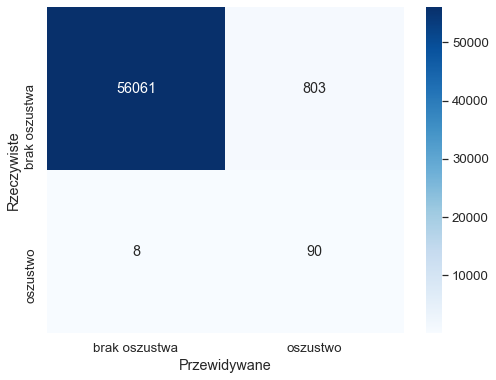

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [37]:
#Finalny model z tylko oversamplingiem
oversampler = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
# recall=recall_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

# print(f"Czułość : {recall}")
print(f"ROC-AUC : {roc_auc}")

class_rep=classification_report(y_test, y_pred)
print(class_rep)

cm = confusion_matrix(y_test, y_pred)
class_names = ['brak oszustwa', 'oszustwo']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

class_rep=classification_report(y_test, y_pred)
print(class_rep)

Class
0    75816
1    45490
Name: count, dtype: int64
ROC-AUC : 0.9520790026759156
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



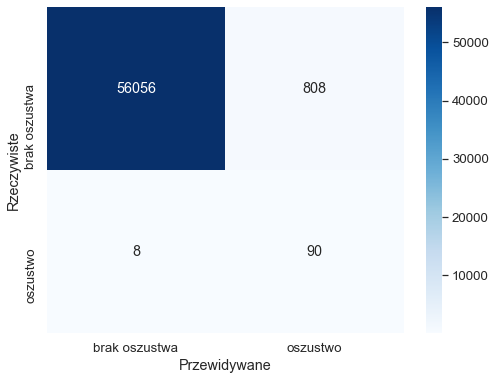

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [38]:
#Finalny model z under i oversamplingiem jednocześnie
oversampler = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled_0, y_resampled_0 = oversampler.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled_0, y_resampled_0)
print(y_resampled.value_counts())

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
# recall=recall_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

# print(f"Czułość : {recall}")
print(f"ROC-AUC : {roc_auc}")

class_rep=classification_report(y_test, y_pred)
print(class_rep)

cm = confusion_matrix(y_test, y_pred)
class_names = ['brak oszustwa', 'oszustwo']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

class_rep=classification_report(y_test, y_pred)
print(class_rep)

Rezultaty zarówno podejścia z dużym oversamplingiem jak i podejścia mieszanego są bardzo zbliżone do siebie. Różnią się tylko tym, że w metodzie mieszanej 5 przypadków więcej zostało zaklasyfikowanych jako False Negative.
Zaletą korzystania z metody mieszanej jest mniejsza liczba danych, dzięki czemu otrzymujemy zbliżone wyniki przy mniejszym koście obliczeniowym i w krótszym czasie.

### Wykorzystanie funkcji kosztu

Class
0    75816
1    45490
Name: count, dtype: int64
ROC-AUC : 0.8222712551537215
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     56864
           1       0.01      0.97      0.01        98

    accuracy                           0.68     56962
   macro avg       0.50      0.82      0.41     56962
weighted avg       1.00      0.68      0.80     56962



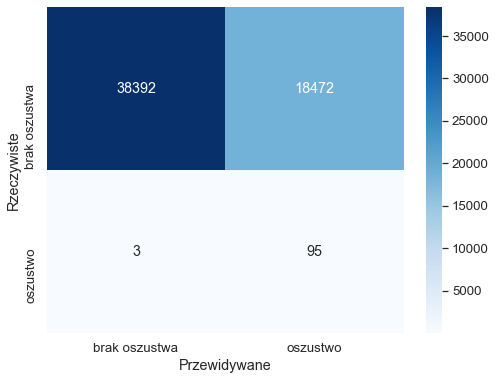

187720


In [67]:
oversampler = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled_0, y_resampled_0 = oversampler.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled_0, y_resampled_0)
print(y_resampled.value_counts())

A=1000
B=10
weights={ 0: B, 1: A}
model=LogisticRegression(solver='lbfgs', class_weight=weights)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

roc_auc=roc_auc_score(y_test, y_pred)
print(f"ROC-AUC : {roc_auc}")

class_rep=classification_report(y_test, y_pred)
print(class_rep)

cm = confusion_matrix(y_test, y_pred)
class_names = ['brak oszustwa', 'oszustwo']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

class_rep=classification_report(y_test, y_pred)

cost = cm[1, 0] * A + cm[0, 1] * B
print(cost)


Założono, że koszt niewykrycia oszustwa wynosi 1000, a koszty administracyjne niesłusznego podejrzenia 10.
Regresja logistyczna z uwględnieniem takich wag daje powyższy rezultat. Łączny koszt to 187720.